In [1]:
import pandas as pd
# pd.set_option('max_colwidth', 50)
# set this if you need to

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [2]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=True, dtype={'phone_number': str})
businesses.head()
# dtype casts the column as a specific data type

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109
2,24,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,NaN,H24,352312.0,NaN,OMNI San Francisco Hotel Corp,"500 California St, 2nd Floor",San Francisco,CA,94104
3,31,Norman's Ice Cream and Freezes,2801 Leavenworth St,San Francisco,94133,37.807155,-122.419004,NaN,H24,346882.0,NaN,Norman Antiforda,2801 Leavenworth St,San Francisco,CA,94133
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM St,S.F.,94110,37.747114,-122.413641,NaN,H24,340024.0,10/10/2001,"HARB, CHARLES AND KRISTIN",1150 SANCHEZ,S.F.,CA,94114


In [3]:
businesses.describe()

,business_id,latitude,longitude,business_certificate
count,7544.000000,4622.000000,4622.000000,6.325000e+03
mean,45598.628314,37.643185,-122.001268,4.993254e+05
std,33127.061603,2.218984,7.191391,2.740166e+05
min,10.000000,0.000000,-122.510896,6.710000e+02
25%,6051.250000,37.760521,-122.435961,3.676290e+05
50%,62572.500000,37.780919,-122.418536,4.510140e+05
75%,76842.500000,37.790130,-122.406553,4.855150e+05
max,87213.000000,37.875937,0.000000,7.451600e+06


In [4]:
businesses.isnull().sum()

business_id                0
name                       2
address                    0
city                    1766
postal_code              296
latitude                2922
longitude               2922
phone_number            5371
TaxCode                    8
business_certificate    1219
application_date        1909
owner_name                 8
owner_address             22
owner_city                38
owner_state               37
owner_zip                 64
dtype: int64

In [5]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=True)
inspections.head()

,business_id,Score,date,type
0,10,NaN,20140807,Reinspection/Followup
1,10,94.0,20140729,Routine - Unscheduled
2,10,NaN,20140124,Reinspection/Followup
3,10,92.0,20140114,Routine - Unscheduled
4,19,94.0,20141110,Routine - Unscheduled


In [6]:
inspections.describe()

,business_id,Score,date
count,27285.000000,15263.000000,2.728500e+04
mean,42194.754444,91.424949,2.014230e+07
std,32661.009655,8.068309,8.907601e+03
min,10.000000,42.000000,2.013041e+07
25%,5025.000000,88.000000,2.013121e+07
50%,59065.000000,94.000000,2.014071e+07
75%,72136.000000,98.000000,2.015043e+07
max,87122.000000,100.000000,2.016122e+07


In [7]:
inspections.isnull().sum()

business_id        0
Score          12022
date               0
type               0
dtype: int64

In [8]:
violations = pd.read_csv('./data/violations_plus.csv', parse_dates=True)
violations.head()

,business_id,date,ViolationTypeID,risk_category,description
0,10,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings
1,10,20140114,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
2,10,20140114,103145,Low Risk,Improper storage of equipment utensils or linens
3,10,20140729,103129,Moderate Risk,Insufficient hot water or running water
4,10,20140729,103144,Low Risk,Unapproved or unmaintained equipment or utensils


In [9]:
violations.describe()

,business_id,date,ViolationTypeID
count,39720.000000,3.972000e+04,39720.000000
mean,37312.545871,2.014214e+07,103134.340483
std,31485.673651,9.072873e+03,16.721454
min,10.000000,2.013041e+07,103101.000000
25%,3729.000000,2.013120e+07,103120.000000
50%,35464.000000,2.014062e+07,103139.000000
75%,68764.000000,2.015042e+07,103149.000000
max,86845.000000,2.016040e+07,103178.000000


In [10]:
violations.isnull().sum()

business_id         0
date                0
ViolationTypeID     0
risk_category      10
description        10
dtype: int64

In [11]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html

merge_1 = pd.merge(businesses, inspections, on = 'business_id', how = 'outer')
merge_1

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip,Score,date,type
0,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104,NaN,20140807.0,Reinspection/Followup
1,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104,94.0,20140729.0,Routine - Unscheduled
2,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104,NaN,20140124.0,Reinspection/Followup
3,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104,92.0,20140114.0,Routine - Unscheduled
4,19.0,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109,94.0,20141110.0,Routine - Unscheduled
5,19.0,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109,94.0,20140214.0,Routine - Unscheduled
6,19.0,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109,96.0,20130904.0,Routine - Unscheduled
7,24.0,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,NaN,H24,352312.0,NaN,OMNI San Francisco Hotel Corp,"500 California St, 2nd Floor",San Francisco,CA,94104,96.0,20160311.0,Routine - Unscheduled
8,24.0,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,NaN,H24,352312.0,NaN,OMNI San Francisco Hotel Corp,"500 California St, 2nd Floor",San Francisco,CA,94104,96.0,20141124.0,Routine - Unscheduled
9,24.0,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,NaN,H24,352312.0,NaN,OMNI San Francisco Hotel Corp,"500 California St, 2nd Floor",San Francisco,CA,94104,96.0,20140612.0,Routine - Unscheduled


In [12]:
merge_1.describe()

,business_id,latitude,longitude,business_certificate,Score,date
count,28944.000000,19332.000000,19332.000000,2.486500e+04,15299.000000,2.734200e+04
mean,42492.084335,37.659274,-122.059653,4.817939e+05,91.432577,2.014230e+07
std,32719.909075,2.066039,6.696003,2.453885e+05,8.068041,8.911745e+03
min,10.000000,0.000000,-122.510896,6.710000e+02,42.000000,2.013041e+07
25%,5315.500000,37.758132,-122.437784,3.681020e+05,88.000000,2.013121e+07
50%,59372.000000,37.779847,-122.419320,4.483250e+05,94.000000,2.014071e+07
75%,73998.000000,37.789883,-122.407194,4.819780e+05,98.000000,2.015043e+07
max,87213.000000,37.875937,0.000000,7.451600e+06,100.000000,2.016122e+07


In [13]:
restaurant_scores = pd.merge(merge_1, violations, on = ['business_id', 'date'], how = 'outer')
restaurant_scores

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,...,owner_address,owner_city,owner_state,owner_zip,Score,date,type,ViolationTypeID,risk_category,description
0,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,NaN,20140807.0,Reinspection/Followup,NaN,NaN,NaN
1,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,94.0,20140729.0,Routine - Unscheduled,103129.0,Moderate Risk,Insufficient hot water or running water
2,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,94.0,20140729.0,Routine - Unscheduled,103144.0,Low Risk,Unapproved or unmaintained equipment or utensils
3,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,NaN,20140124.0,Reinspection/Followup,NaN,NaN,NaN
4,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,92.0,20140114.0,Routine - Unscheduled,103154.0,Low Risk,Unclean or degraded floors walls or ceilings
5,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,92.0,20140114.0,Routine - Unscheduled,103119.0,Moderate Risk,Inadequate and inaccessible handwashing facili...
6,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,92.0,20140114.0,Routine - Unscheduled,103145.0,Low Risk,Improper storage of equipment utensils or linens
7,19.0,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,...,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109,94.0,20141110.0,Routine - Unscheduled,103145.0,Low Risk,Improper storage of equipment utensils or linens
8,19.0,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,...,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109,94.0,20141110.0,Routine - Unscheduled,103116.0,Moderate Risk,Inadequate food safety knowledge or lack of ce...
9,19.0,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,...,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109,94.0,20140214.0,Routine - Unscheduled,103156.0,Low Risk,Permit license or inspection report not posted


In [14]:
restaurant_scores.describe()

,business_id,latitude,longitude,business_certificate,Score,date,ViolationTypeID
count,59051.000000,42269.000000,42269.000000,5.178600e+04,41801.000000,5.744900e+04,43963.000000
mean,40346.194036,37.665640,-122.076333,4.678310e+05,86.122318,2.014234e+07,103134.176785
std,32326.047081,2.018284,6.541015,2.326452e+05,9.594109,9.047534e+03,16.770568
min,10.000000,0.000000,-122.510896,6.710000e+02,42.000000,2.013041e+07,103101.000000
25%,4531.000000,37.759393,-122.437135,3.623060e+05,81.000000,2.013121e+07,103120.000000
50%,38485.000000,37.780597,-122.418804,4.431300e+05,88.000000,2.014071e+07,103139.000000
75%,70549.000000,37.790498,-122.407507,4.778900e+05,94.000000,2.015043e+07,103149.000000
max,87213.000000,37.875937,0.000000,7.451600e+06,100.000000,2.016122e+07,103178.000000


In [15]:
restaurant_scores.isnull().sum()

business_id                 0
name                      266
address                   264
city                     9785
postal_code              1693
latitude                16782
longitude               16782
phone_number            42398
TaxCode                   272
business_certificate     7265
application_date        15543
owner_name                368
owner_address             436
owner_city                518
owner_state               524
owner_zip                 662
Score                   17250
date                     1602
type                     1651
ViolationTypeID         15088
risk_category           15100
description             15100
dtype: int64

In [16]:
# 2 Which ten business have had the most inspections?
restaurant_scores.groupby(['business_id', 'name'])['type'].agg('count').sort_values(ascending = False).head(10)

business_id  name                        
10238.0      King of Thai Noodle House       69
75139.0      Hakka Restaurant                66
71385.0      Yama Sushi Restaurant           66
2945.0       New Sun Hong Kong Restaurant    62
77693.0      SH Dream Inc                    62
67154.0      RIVERSIDE SEAFOOD RESTAURANT    60
3151.0       New Asia Restaurant             59
64176.0      Dragon River Restaurant         59
63082.0      The Brick Yard                  58
489.0        Dol-Ho Restaurant               55
Name: type, dtype: int64

In [17]:
# 3 Group and count the inspections by type
# restaurant_scores.groupby('type')['type'].agg('count').sort_values(ascending = False)
restaurant_scores.type.value_counts()

Routine - Unscheduled                42222
Reinspection/Followup                 6043
Complaint                             3155
New Ownership                         2665
New Construction                      1643
Non-inspection site visit             1008
Foodborne Illness Investigation        246
Complaint Reinspection/Followup        168
Structural Inspection                  142
Routine - Scheduled                    100
Administrative or Document Review        4
Special Event                            2
Multi-agency Investigation               2
Name: type, dtype: int64

In [18]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap

restaurant_scores['month'] = restaurant_scores['date'].apply(lambda x:str(x)[:6])
restaurant_scores['month'].value_counts()

201404    2398
201406    2321
201403    2317
201405    2275
201402    2188
201603    2016
201310    1912
201309    1902
201305    1895
201308    1784
201307    1751
201504    1728
201306    1671
201503    1663
201409    1654
201401    1643
201311    1621
nan       1602
201408    1572
201410    1560
201602    1531
201304    1449
201501    1431
201312    1407
201502    1407
201508    1378
201505    1372
201411    1349
201506    1342
201509    1322
201407    1234
201510    1215
201507    1170
201412    1063
201601    1012
201512     921
201511     832
201604     142
201612       1
Name: month, dtype: int64

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

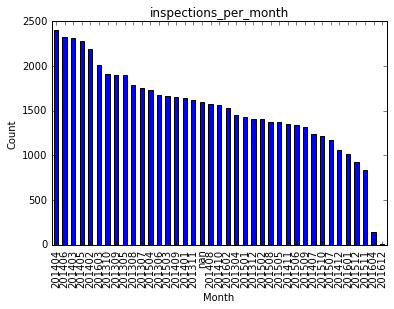

In [20]:
restaurant_scores['month'].value_counts().plot(kind='bar', title='inspections_per_month')
plt.xlabel('Month')
plt.ylabel('Count')

In [21]:
import seaborn as sns

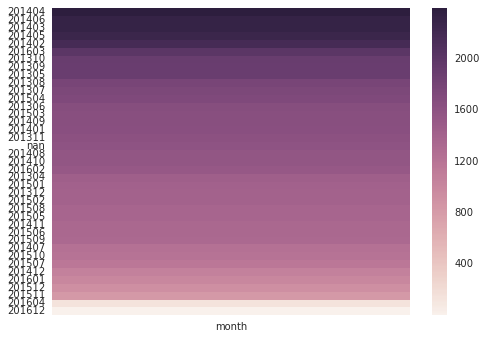

In [22]:
heatmap_data = pd.DataFrame(restaurant_scores['month'].value_counts())
sns.heatmap(heatmap_data)

In [23]:
# 5 Which zip code contains the most high risk violations?
restaurant_scores.risk_category.value_counts()

Low Risk         22794
Moderate Risk    14862
High Risk         6295
Name: risk_category, dtype: int64

In [24]:
restaurant_scores['postal_code'][restaurant_scores.risk_category=='High Risk'].value_counts().head(1)
# ??? for office hours: how do i know whether to use postal_code or owner_zip? owner_zip produces smaller answer???

94133    618
Name: postal_code, dtype: int64

In [25]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk? LOW RISK.
restaurant_scores.type.value_counts()

Routine - Unscheduled                42222
Reinspection/Followup                 6043
Complaint                             3155
New Ownership                         2665
New Construction                      1643
Non-inspection site visit             1008
Foodborne Illness Investigation        246
Complaint Reinspection/Followup        168
Structural Inspection                  142
Routine - Scheduled                    100
Administrative or Document Review        4
Special Event                            2
Multi-agency Investigation               2
Name: type, dtype: int64

In [26]:
restaurant_scores['risk_category'][restaurant_scores.type=='New Ownership'].value_counts()

Low Risk         553
Moderate Risk    419
High Risk        148
Name: risk_category, dtype: int64

In [27]:
# 7 Examining the descriptions, what is the most common violation?

In [28]:
restaurant_scores.description.value_counts().head(1)

Unclean or degraded floors walls or ceilings    3757
Name: description, dtype: int64

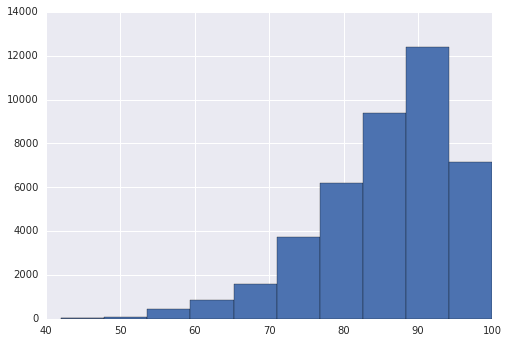

In [29]:
# 8 Create a hist of the scores with 10 bins
restaurant_scores.Score.hist(bins=10)

In [30]:
# 9 Can you predict risk category based on the other features in this dataset?
restaurant_scores['ViolationTypeID'].value_counts().head()

103154.0    3757
103120.0    2873
103119.0    2701
103144.0    2610
103149.0    2514
Name: ViolationTypeID, dtype: int64

In [31]:
restaurant_scores['risk_category'][restaurant_scores.ViolationTypeID==103149.0].value_counts()
# after testing the top 5, it seems to be generally of low or moderate risk. 
# the most commonly ocurring ViolationTypeID of 13154.0 is low risk

Low Risk    2514
Name: risk_category, dtype: int64

In [32]:
# 10 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/

In [33]:
############################
### A Little More Morbid ###
############################

In [34]:
killings = pd.read_csv('./data/police-killings.csv')
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [35]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race
killings.rename(columns={'lawenforcementagency': 'agency', 'raceethnicity': 'race'}, inplace=True)
killings.head()

,Unnamed: 0,name,age,gender,race,month,day,year,streetaddress,city,state,agency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [36]:
# 2. Show the count of missing values in each column
killings.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [37]:
# 3. replace each null value in the dataframe with the string "Unknown"
killings.fillna(value='Unknown', inplace=True)
killings.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    0
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [38]:
# 4. How many killings were there so far in 2015?
killings.year.value_counts()

2015    467
Name: year, dtype: int64

In [39]:
# 5. Of all killings, how many were male and how many female?
killings.groupby('gender').cause.count()

gender
Female     22
Male      445
Name: cause, dtype: int64

In [40]:
# 6. How many killings were of unarmed people?
killings.armed.value_counts()

Firearm               230
No                    102
Knife                  68
Other                  26
Vehicle                18
Non-lethal firearm     14
Unknown                 7
Disputed                2
Name: armed, dtype: int64

In [41]:
killings['armed'][(killings['armed']=='No')|(killings['armed']=='Vehicle')].count()

120

In [42]:
# 7. What percentage of all killings were unarmed?
(killings['armed'][(killings['armed']=='No')|(killings['armed']=='Vehicle')].count())/float(killings.armed.count())

0.2569593147751606

In [43]:
# 8. What are the 5 states with the most killings?
killings['state'].value_counts().head()

CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

In [44]:
# 9. Show a value counts of deaths for each race
killings['race'].value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

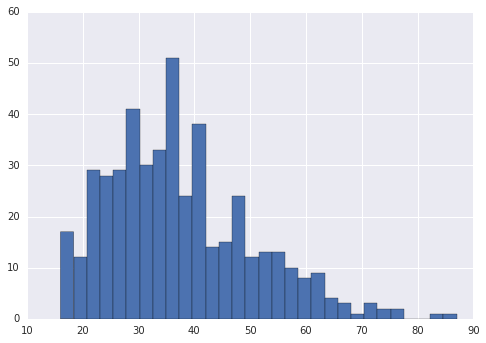

In [45]:
# 10. Display a histogram of ages of all killings
killings.age.hist(bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c61e8d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ca39c50>]], dtype=object)

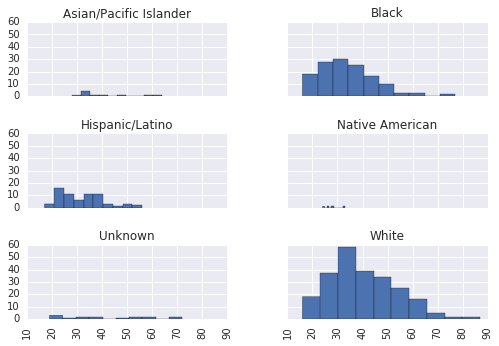

In [46]:
# 11. Show 6 histograms of ages by race
killings.age.hist(by=killings.race, sharex=True, sharey=True)

In [47]:
# 12. What is the average age of death by race?
killings.groupby('race').age.mean()

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

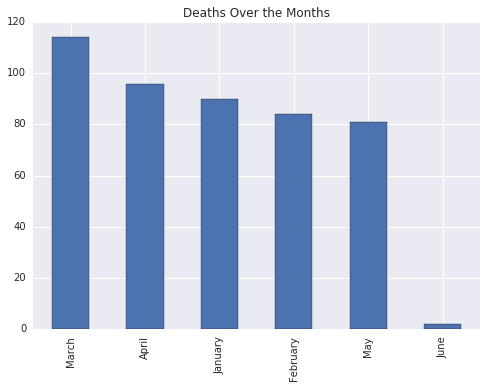

In [48]:
# 13. Show a bar chart with counts of deaths every month
killings.month.value_counts().plot(kind='bar', title='Deaths Over the Months')
# ??? ask in office hours...is there an easy way to convert these months to text, so it can be sorted???

In [49]:
###################
### Less Morbid ###
###################

In [50]:
majors = pd.read_csv('./data/college-majors.csv')
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [51]:
majors.columns = [x.lower() for x in majors.columns]
majors.head()

,unnamed: 0,major_code,major,major_category,total,employed,employed_full_time_year_round,unemployed,unemployment_rate,median,p25th,p75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [52]:
# 1. Delete the columns (employed_full_time_year_round, major_code)
majors.drop(['employed_full_time_year_round','major_code'], axis=1, inplace=True)

In [53]:
majors.head()

,unnamed: 0,major,major_category,total,employed,unemployed,unemployment_rate,median,p25th,p75th
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0


In [54]:
# 2. Show the cout of missing values in each column
majors.isnull().sum()

unnamed: 0           0
major                0
major_category       0
total                0
employed             0
unemployed           0
unemployment_rate    0
median               0
p25th                0
p75th                0
dtype: int64

In [55]:
# 3. What are the top 10 highest paying majors?
top10 = majors[['major','median']].sort_index(by='median', ascending = False).head(10)
top10

/Users/jenny/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


,major,median
59,PETROLEUM ENGINEERING,125000
154,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,106000
57,NAVAL ARCHITECTURE AND MARINE ENGINEERING,97000
55,METALLURGICAL ENGINEERING,96000
58,NUCLEAR ENGINEERING,95000
56,MINING AND MINERAL ENGINEERING,92000
97,MATHEMATICS AND COMPUTER SCIENCE,92000
48,ELECTRICAL ENGINEERING,88000
45,CHEMICAL ENGINEERING,86000
51,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,85000


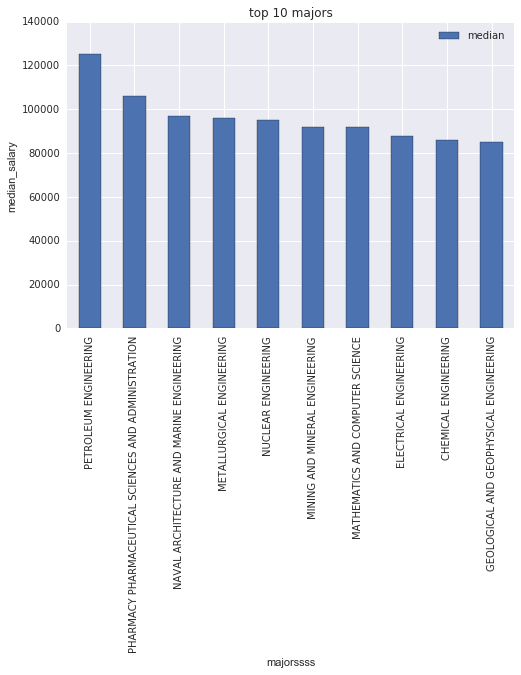

In [56]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!
top10.plot(kind='bar', title = 'top 10 majors', x='major', y='median')
plt.xlabel('majorssss')
plt.ylabel('median_salary')

In [57]:
# 5. What is the average median salary for each major category?
major_category_pay = majors.groupby('major_category').mean()['median'].sort_values(ascending = False)
major_category_pay

major_category
Engineering                            77758.620690
Computers & Mathematics                66272.727273
Physical Sciences                      62400.000000
Business                               60615.384615
Health                                 56458.333333
Agriculture & Natural Resources        55000.000000
Social Science                         53222.222222
Law & Public Policy                    52800.000000
Industrial Arts & Consumer Services    52642.857143
Biology & Life Science                 50821.428571
Communications & Journalism            49500.000000
Humanities & Liberal Arts              46080.000000
Psychology & Social Work               44555.555556
Education                              43831.250000
Arts                                   43525.000000
Interdisciplinary                      43000.000000
Name: median, dtype: float64

In [58]:
# 6. Show only the top 5 paying major categories
major_category_pay.head(5)

major_category
Engineering                77758.620690
Computers & Mathematics    66272.727273
Physical Sciences          62400.000000
Business                   60615.384615
Health                     56458.333333
Name: median, dtype: float64

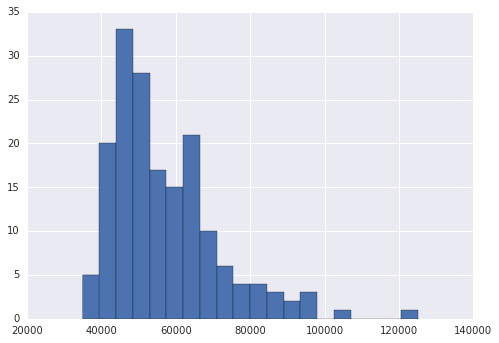

In [59]:
# 7. Plot a histogram of the distribution of median salaries
majors['median'].hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ca23c10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ebbbfd0>]], dtype=object)

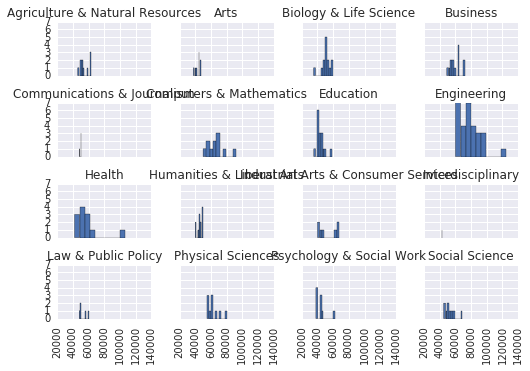

In [60]:
# 8. Plot a histogram of the distribution of median salaries by major category
majors['median'].hist(by=majors.major_category, bins=10, sharex=True, sharey=True)

In [61]:
# 9. What are the top 10 most UNemployed majors?

In [62]:
majors.groupby('major').unemployed.mean().sort_values(ascending=False).head(10)

major
BUSINESS MANAGEMENT AND ADMINISTRATION    147261
GENERAL BUSINESS                           85626
PSYCHOLOGY                                 79066
ACCOUNTING                                 75379
COMMUNICATIONS                             54390
ENGLISH LANGUAGE AND LITERATURE            52248
MARKETING AND MARKETING RESEARCH           51839
POLITICAL SCIENCE AND GOVERNMENT           40376
GENERAL EDUCATION                          38742
BIOLOGY                                    36757
Name: unemployed, dtype: int64

In [64]:
# What are the unemployment rates?
majors.groupby('major')['unemployed','unemployment_rate'].sum().sort_values(by='unemployed', ascending=False).head(10)

,unemployed,unemployment_rate
major,,
BUSINESS MANAGEMENT AND ADMINISTRATION,147261,0.058865
GENERAL BUSINESS,85626,0.051378
PSYCHOLOGY,79066,0.069667
ACCOUNTING,75379,0.053415
COMMUNICATIONS,54390,0.064360
ENGLISH LANGUAGE AND LITERATURE,52248,0.068645
MARKETING AND MARKETING RESEARCH,51839,0.055033
POLITICAL SCIENCE AND GOVERNMENT,40376,0.069374
GENERAL EDUCATION,38742,0.043904


In [65]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category

majors.groupby('major_category').unemployed.mean().sort_values(ascending=False).head(10)


major_category
Business                       33415.153846
Communications & Journalism    25299.750000
Social Science                 14683.333333
Arts                           13015.625000
Humanities & Liberal Arts      11942.400000
Psychology & Social Work       11578.444444
Law & Public Policy             8609.800000
Education                       7833.500000
Computers & Mathematics         7270.363636
Health                          6251.083333
Name: unemployed, dtype: float64

In [68]:
# What are the unemployment rates?
majors.groupby('major_category')['unemployed','unemployment_rate'].sum().sort_values(by='unemployed', ascending=False).head(10)

,unemployed,unemployment_rate
major_category,,
Business,434397,0.708448
Humanities & Liberal Arts,179136,1.041431
Engineering,146389,1.468271
Social Science,132150,0.591171
Education,125336,0.748191
Psychology & Social Work,104206,0.700803
Arts,104125,0.700804
Communications & Journalism,101199,0.276498
Computers & Mathematics,79974,0.653807


In [66]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042
majors['sample_employment_rate'] = majors.employed / majors.total
majors.head()

,unnamed: 0,major,major_category,total,employed,unemployed,unemployment_rate,median,p25th,p75th,sample_employment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0,0.704225
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0,0.806338
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0,0.775173
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0,0.783948
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0,0.711738


In [67]:
# 12. Create a "sample_unemployment_rate" column
# this column should be 1 - "sample_employment_rate"
majors['sample_unemployment_rate']= 1 - majors.sample_employment_rate
majors.head()

,unnamed: 0,major,major_category,total,employed,unemployed,unemployment_rate,median,p25th,p75th,sample_employment_rate,sample_unemployment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0,0.704225,0.295775
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0,0.806338,0.193662
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0,0.775173,0.224827
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0,0.783948,0.216052
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0,0.711738,0.288262
